In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sn
import datetime

In [2]:
import sys
from pathlib import Path
# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[0] / "src")

if module_path not in sys.path:
    sys.path.append(module_path)
from preprocessing import import_preprocessed_data, assign_holidays, assign_weather

In [3]:
%load_ext autoreload
%autoreload 2
%aimport preprocessing

Include all data into DataFrames

In [2]:
dfs_c_0, dfs_c_1, dfs_c_2, dfs_c_0_grouped, dfs_c_1_grouped, dfs_c_2_grouped = import_preprocessed_data() # import all data

Include holiday data, holiday = 1, no holiday = 0

In [4]:
holiday = '../data/raw/holidays.csv'
df_holiday = pd.read_csv(holiday)
df_holiday

,Date,Holiday
0,2020-01-01,1
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,1
...,...,...
726,2021-12-27,0
727,2021-12-28,0
728,2021-12-29,0
729,2021-12-30,0


In [7]:
for df in dfs_c_0_grouped: 
    assign_holidays(df, df_holiday)
for df in dfs_c_1_grouped: 
    assign_holidays(df, df_holiday)
for df in dfs_c_2_grouped: 
    assign_holidays(df, df_holiday)

C:\Users\hendr\AppData\Local\Temp/ipykernel_8496/2432097566.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['holiday'][i] = df_holiday['Holiday'][j]


Include weather data of Frankfurt airport

In [8]:
weather_path = '../data/raw/weather_FrankfurtAirport.csv'
df_weather = pd.read_csv(weather_path)
df_weather

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2020-05-08,17.5,8.2,24.8,0.0,0,112.0,7.2,27.7,1018.0,616
1,2020-05-09,15.7,12.5,17.4,0.6,0,60.0,11.5,25.2,1013.5,10
2,2020-05-10,16.8,11.7,24.9,2.9,0,129.0,8.6,63.0,1006.5,308
3,2020-05-11,7.2,1.9,15.5,9.0,0,56.0,23.8,61.2,1009.2,38
4,2020-05-12,7.9,1.0,14.2,0.0,0,130.0,8.3,24.1,1018.7,736
...,...,...,...,...,...,...,...,...,...,...,...
361,2021-05-04,10.5,8.0,13.7,0.0,0,215.0,32.4,77.8,1006.5,67
362,2021-05-05,7.9,4.1,11.4,0.7,0,248.0,24.1,65.5,1008.7,422
363,2021-05-06,6.9,3.2,12.1,5.9,0,174.0,11.5,34.9,1009.1,46
364,2021-05-07,7.5,1.5,12.1,0.7,0,273.0,14.4,59.4,1015.9,654


In [10]:
# assign to all DataFrames
for df in dfs_c_0_grouped: 
    assign_weather(df, df_weather)
for df in dfs_c_1_grouped: 
    assign_weather(df, df_weather)
for df in dfs_c_2_grouped: 
    assign_weather(df, df_weather)

C:\Users\hendr\AppData\Local\Temp/ipykernel_8496/777759664.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temp avg'][i] = df_weather['tavg'][j]
C:\Users\hendr\AppData\Local\Temp/ipykernel_8496/777759664.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temp min'][i] = df_weather['tmin'][j]
C:\Users\hendr\AppData\Local\Temp/ipykernel_8496/777759664.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temp max'][i] =

                  inter_pol  Temperature      Tilt   holiday  temp avg  \
inter_pol          1.000000     0.272704  0.066792  0.036456  0.330773   
Temperature        0.272704     1.000000 -0.253476 -0.101045  0.954478   
Tilt               0.066792    -0.253476  1.000000  0.060309 -0.241740   
holiday            0.036456    -0.101045  0.060309  1.000000 -0.109564   
temp avg           0.330773     0.954478 -0.241740 -0.109564  1.000000   
temp min           0.352179     0.858892 -0.164456 -0.095769  0.947680   
temp max           0.289772     0.963847 -0.285066 -0.107842  0.976731   
rainfall sum       0.059159    -0.054447  0.060050 -0.043965  0.011288   
snowfall sum      -0.051326    -0.223033  0.174676 -0.032307 -0.270178   
sunshine minutes   0.110113     0.648934 -0.234403 -0.005993  0.495271   

                  temp min  temp max  rainfall sum  snowfall sum  \
inter_pol         0.352179  0.289772      0.059159     -0.051326   
Temperature       0.858892  0.963847     -0.05444

<AxesSubplot:>

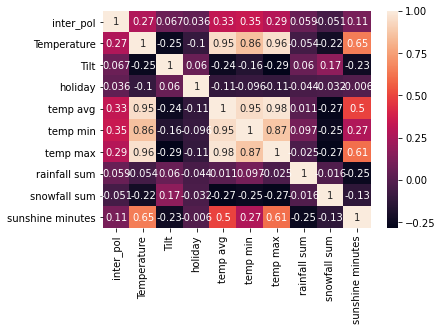

In [13]:
# Loading one container dataset
data = dfs_c_0_grouped[0]
 
# Numeric columns of the dataset
numeric_col = ['inter_pol','Temperature','Tilt','holiday','temp avg','temp min','temp max','rainfall sum','snowfall sum','sunshine minutes']
 
# Correlation Matrix formation
corr_matrix = data.loc[:,numeric_col].corr()
print(corr_matrix)
 
#Using heatmap to visualize the correlation matrix
sn.heatmap(corr_matrix, annot=True)

The matrix shows, that there is poor correlation between the features and the target (inter_pol). Therefore, the features will not be used further.